In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt


# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [7]:
# We can view all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [10]:
from sqlalchemy import inspect

inspector = inspect(engine)
inspector.get_table_names()


['measurement', 'station']

In [11]:
columns = inspector.get_columns('measurement')
for c in columns:
    print(c["name"], c["type"])
    
columns2 = inspector.get_columns('station') 
for x in columns2:
    print(x["name"], x["type"])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT
id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


In [12]:
test = session.query(Measurement.date)
for d in test:
    print(d)

('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-01-17',)
('2010-01-18',)
('2010-01-19',)
('2010-01-20',)
('2010-01-21',)
('2010-01-22',)
('2010-01-23',)
('2010-01-24',)
('2010-01-25',)
('2010-01-26',)
('2010-01-27',)
('2010-01-28',)
('2010-01-30',)
('2010-01-31',)
('2010-02-01',)
('2010-02-03',)
('2010-02-04',)
('2010-02-05',)
('2010-02-06',)
('2010-02-07',)
('2010-02-08',)
('2010-02-09',)
('2010-02-11',)
('2010-02-12',)
('2010-02-13',)
('2010-02-14',)
('2010-02-15',)
('2010-02-16',)
('2010-02-17',)
('2010-02-19',)
('2010-02-20',)
('2010-02-21',)
('2010-02-22',)
('2010-02-23',)
('2010-02-24',)
('2010-02-25',)
('2010-02-26',)
('2010-02-28',)
('2010-03-01',)
('2010-03-02',)
('2010-03-03',)
('2010-03-04',)
('2010-03-05',)
('2010-03-06',)
('2010-03-07',)
('2010-03-08',)
('2010-03-09',)
('2010-03-11',)
('2010-0

('2013-12-28',)
('2013-12-29',)
('2013-12-30',)
('2013-12-31',)
('2014-01-01',)
('2014-01-02',)
('2014-01-03',)
('2014-01-04',)
('2014-01-05',)
('2014-01-06',)
('2014-01-07',)
('2014-01-08',)
('2014-01-09',)
('2014-01-10',)
('2014-01-11',)
('2014-01-12',)
('2014-01-13',)
('2014-01-14',)
('2014-01-15',)
('2014-01-16',)
('2014-01-17',)
('2014-01-18',)
('2014-01-19',)
('2014-01-20',)
('2014-01-21',)
('2014-01-22',)
('2014-01-23',)
('2014-01-24',)
('2014-01-25',)
('2014-01-26',)
('2014-01-27',)
('2014-01-28',)
('2014-01-29',)
('2014-01-30',)
('2014-01-31',)
('2014-02-01',)
('2014-02-02',)
('2014-02-03',)
('2014-02-04',)
('2014-02-05',)
('2014-02-06',)
('2014-02-07',)
('2014-02-08',)
('2014-02-09',)
('2014-02-10',)
('2014-02-11',)
('2014-02-12',)
('2014-02-13',)
('2014-02-14',)
('2014-02-15',)
('2014-02-16',)
('2014-02-17',)
('2014-02-18',)
('2014-02-19',)
('2014-02-20',)
('2014-02-21',)
('2014-02-22',)
('2014-02-23',)
('2014-02-24',)
('2014-02-25',)
('2014-02-26',)
('2014-02-27',)
('2014-0

('2016-09-26',)
('2016-09-27',)
('2016-09-28',)
('2016-09-29',)
('2016-09-30',)
('2016-10-01',)
('2016-10-02',)
('2016-10-03',)
('2016-10-04',)
('2016-10-05',)
('2016-10-06',)
('2016-10-07',)
('2016-10-08',)
('2016-10-09',)
('2016-10-10',)
('2016-10-11',)
('2016-10-12',)
('2016-10-13',)
('2016-10-14',)
('2016-10-15',)
('2016-10-16',)
('2016-10-17',)
('2016-10-18',)
('2016-10-19',)
('2016-10-20',)
('2016-10-21',)
('2016-10-22',)
('2016-10-23',)
('2016-10-24',)
('2016-10-25',)
('2016-10-26',)
('2016-10-27',)
('2016-10-28',)
('2016-10-29',)
('2016-10-30',)
('2016-10-31',)
('2016-11-01',)
('2016-11-02',)
('2016-11-03',)
('2016-11-04',)
('2016-11-05',)
('2016-11-06',)
('2016-11-07',)
('2016-11-08',)
('2016-11-09',)
('2016-11-10',)
('2016-11-11',)
('2016-11-12',)
('2016-11-13',)
('2016-11-14',)
('2016-11-15',)
('2016-11-16',)
('2016-11-17',)
('2016-11-18',)
('2016-11-19',)
('2016-11-20',)
('2016-11-21',)
('2016-11-22',)
('2016-11-23',)
('2016-11-24',)
('2016-11-25',)
('2016-11-26',)
('2016-1

('2011-11-23',)
('2011-11-24',)
('2011-11-25',)
('2011-11-26',)
('2011-11-27',)
('2011-11-28',)
('2011-11-29',)
('2011-11-30',)
('2011-12-01',)
('2011-12-02',)
('2011-12-03',)
('2011-12-04',)
('2011-12-05',)
('2011-12-06',)
('2011-12-07',)
('2011-12-08',)
('2011-12-09',)
('2011-12-10',)
('2011-12-11',)
('2011-12-12',)
('2011-12-13',)
('2011-12-14',)
('2011-12-15',)
('2011-12-16',)
('2011-12-17',)
('2011-12-18',)
('2011-12-19',)
('2011-12-20',)
('2011-12-21',)
('2011-12-22',)
('2011-12-23',)
('2011-12-24',)
('2011-12-25',)
('2011-12-26',)
('2011-12-27',)
('2011-12-28',)
('2011-12-29',)
('2011-12-30',)
('2011-12-31',)
('2012-01-01',)
('2012-01-02',)
('2012-01-03',)
('2012-01-04',)
('2012-01-05',)
('2012-01-06',)
('2012-01-07',)
('2012-01-08',)
('2012-01-09',)
('2012-01-10',)
('2012-01-11',)
('2012-01-12',)
('2012-01-13',)
('2012-01-14',)
('2012-01-15',)
('2012-01-16',)
('2012-01-17',)
('2012-01-19',)
('2012-01-20',)
('2012-01-21',)
('2012-01-22',)
('2012-01-23',)
('2012-01-24',)
('2012-0

('2016-02-11',)
('2016-02-12',)
('2016-02-13',)
('2016-02-14',)
('2016-02-15',)
('2016-02-16',)
('2016-02-17',)
('2016-02-18',)
('2016-02-19',)
('2016-02-20',)
('2016-02-21',)
('2016-02-22',)
('2016-02-23',)
('2016-02-24',)
('2016-02-25',)
('2016-02-26',)
('2016-02-27',)
('2016-02-28',)
('2016-02-29',)
('2016-03-01',)
('2016-03-02',)
('2016-03-03',)
('2016-03-04',)
('2016-03-05',)
('2016-03-06',)
('2016-03-07',)
('2016-03-08',)
('2016-03-09',)
('2016-03-10',)
('2016-03-11',)
('2016-03-12',)
('2016-03-13',)
('2016-03-14',)
('2016-03-15',)
('2016-03-16',)
('2016-03-17',)
('2016-03-18',)
('2016-03-19',)
('2016-03-20',)
('2016-03-21',)
('2016-03-22',)
('2016-03-23',)
('2016-03-24',)
('2016-03-25',)
('2016-03-26',)
('2016-03-27',)
('2016-03-28',)
('2016-03-29',)
('2016-03-30',)
('2016-03-31',)
('2016-04-01',)
('2016-04-02',)
('2016-04-03',)
('2016-04-04',)
('2016-04-05',)
('2016-04-06',)
('2016-04-07',)
('2016-04-08',)
('2016-04-09',)
('2016-04-10',)
('2016-04-11',)
('2016-04-12',)
('2016-0

('2013-06-27',)
('2013-07-01',)
('2013-07-02',)
('2013-07-03',)
('2013-07-04',)
('2013-07-05',)
('2013-07-06',)
('2013-07-08',)
('2013-07-09',)
('2013-07-10',)
('2013-07-11',)
('2013-07-12',)
('2013-07-13',)
('2013-07-14',)
('2013-07-15',)
('2013-07-16',)
('2013-07-17',)
('2013-07-18',)
('2013-07-19',)
('2013-07-20',)
('2013-07-22',)
('2013-07-23',)
('2013-07-24',)
('2013-07-25',)
('2013-07-26',)
('2013-07-27',)
('2013-07-29',)
('2013-07-30',)
('2013-07-31',)
('2013-08-19',)
('2013-08-20',)
('2013-08-21',)
('2013-08-22',)
('2013-08-23',)
('2013-08-25',)
('2013-08-26',)
('2013-08-27',)
('2013-08-28',)
('2013-08-29',)
('2013-08-30',)
('2013-08-31',)
('2013-09-02',)
('2013-09-03',)
('2013-09-04',)
('2013-09-05',)
('2013-09-06',)
('2013-09-07',)
('2013-09-09',)
('2013-09-10',)
('2013-09-11',)
('2013-09-12',)
('2013-09-13',)
('2013-09-14',)
('2013-09-16',)
('2013-09-17',)
('2013-09-18',)
('2013-09-19',)
('2013-09-20',)
('2013-09-22',)
('2013-09-23',)
('2013-09-24',)
('2013-09-25',)
('2013-0

('2011-07-27',)
('2011-07-28',)
('2011-08-01',)
('2011-08-02',)
('2011-08-03',)
('2011-08-04',)
('2011-08-05',)
('2011-08-08',)
('2011-08-09',)
('2011-08-10',)
('2011-08-11',)
('2011-08-12',)
('2011-08-15',)
('2011-08-16',)
('2011-08-17',)
('2011-08-18',)
('2011-08-22',)
('2011-08-23',)
('2011-08-24',)
('2011-08-29',)
('2011-08-31',)
('2011-09-01',)
('2011-09-02',)
('2011-09-06',)
('2011-09-07',)
('2011-09-08',)
('2011-09-09',)
('2011-09-12',)
('2011-09-13',)
('2011-09-14',)
('2011-09-15',)
('2011-09-16',)
('2011-09-19',)
('2011-09-20',)
('2011-09-26',)
('2011-09-27',)
('2011-09-28',)
('2011-09-29',)
('2011-09-30',)
('2011-10-03',)
('2011-10-04',)
('2011-10-05',)
('2011-10-06',)
('2011-10-07',)
('2011-10-10',)
('2011-10-11',)
('2011-10-12',)
('2011-10-13',)
('2011-10-14',)
('2011-10-17',)
('2011-10-18',)
('2011-10-19',)
('2011-10-20',)
('2011-10-21',)
('2011-10-24',)
('2011-10-25',)
('2011-10-26',)
('2011-10-27',)
('2011-10-28',)
('2011-11-03',)
('2011-11-04',)
('2011-11-07',)
('2011-1

('2012-05-24',)
('2012-05-25',)
('2012-05-27',)
('2012-05-28',)
('2012-06-01',)
('2012-06-14',)
('2012-06-21',)
('2012-06-26',)
('2012-06-29',)
('2012-07-02',)
('2012-07-20',)
('2012-07-22',)
('2012-07-23',)
('2012-07-24',)
('2012-07-25',)
('2012-07-30',)
('2012-07-31',)
('2012-08-01',)
('2012-08-03',)
('2012-08-06',)
('2012-08-24',)
('2012-09-14',)
('2012-09-17',)
('2012-09-21',)
('2012-09-24',)
('2012-10-05',)
('2012-10-08',)
('2012-10-10',)
('2012-10-11',)
('2012-10-12',)
('2012-10-15',)
('2012-10-16',)
('2012-10-17',)
('2012-10-18',)
('2012-10-22',)
('2012-11-01',)
('2012-11-08',)
('2012-11-13',)
('2012-11-15',)
('2012-11-16',)
('2012-11-20',)
('2012-11-26',)
('2012-11-27',)
('2012-12-03',)
('2012-12-06',)
('2013-01-10',)
('2013-01-14',)
('2013-01-23',)
('2013-01-24',)
('2013-01-25',)
('2013-02-01',)
('2013-02-02',)
('2013-02-06',)
('2013-02-07',)
('2013-02-08',)
('2013-02-14',)
('2013-02-15',)
('2013-02-20',)
('2013-02-22',)
('2013-02-25',)
('2013-02-27',)
('2013-04-03',)
('2013-0

('2013-10-25',)
('2013-10-26',)
('2013-10-28',)
('2013-10-29',)
('2013-10-30',)
('2013-10-31',)
('2013-11-01',)
('2013-11-02',)
('2013-11-03',)
('2013-11-04',)
('2013-11-05',)
('2013-11-06',)
('2013-11-07',)
('2013-11-08',)
('2013-11-09',)
('2013-11-10',)
('2013-11-11',)
('2013-11-12',)
('2013-11-13',)
('2013-11-14',)
('2013-11-15',)
('2013-11-17',)
('2013-11-20',)
('2013-11-21',)
('2013-11-22',)
('2013-11-23',)
('2013-11-24',)
('2013-11-25',)
('2013-11-26',)
('2013-11-27',)
('2013-11-28',)
('2013-11-29',)
('2013-11-30',)
('2013-12-01',)
('2013-12-02',)
('2013-12-03',)
('2013-12-04',)
('2013-12-05',)
('2013-12-06',)
('2013-12-07',)
('2013-12-08',)
('2013-12-09',)
('2013-12-10',)
('2013-12-11',)
('2013-12-12',)
('2013-12-13',)
('2013-12-14',)
('2013-12-15',)
('2013-12-16',)
('2013-12-17',)
('2013-12-18',)
('2013-12-19',)
('2013-12-20',)
('2013-12-21',)
('2013-12-22',)
('2013-12-23',)
('2013-12-24',)
('2013-12-25',)
('2013-12-26',)
('2013-12-27',)
('2013-12-28',)
('2013-12-29',)
('2013-1

('2010-07-26',)
('2010-07-27',)
('2010-07-28',)
('2010-07-29',)
('2010-07-30',)
('2010-07-31',)
('2010-08-01',)
('2010-08-02',)
('2010-08-03',)
('2010-08-04',)
('2010-08-05',)
('2010-08-06',)
('2010-08-07',)
('2010-08-08',)
('2010-08-09',)
('2010-08-10',)
('2010-08-11',)
('2010-08-12',)
('2010-08-13',)
('2010-08-14',)
('2010-08-15',)
('2010-08-16',)
('2010-08-17',)
('2010-08-18',)
('2010-08-19',)
('2010-08-20',)
('2010-08-21',)
('2010-08-22',)
('2010-08-23',)
('2010-08-24',)
('2010-08-25',)
('2010-08-26',)
('2010-08-27',)
('2010-08-28',)
('2010-08-29',)
('2010-08-30',)
('2010-08-31',)
('2010-09-01',)
('2010-09-02',)
('2010-09-03',)
('2010-09-04',)
('2010-09-05',)
('2010-09-06',)
('2010-09-07',)
('2010-09-08',)
('2010-09-09',)
('2010-09-10',)
('2010-09-11',)
('2010-09-12',)
('2010-09-13',)
('2010-09-14',)
('2010-09-15',)
('2010-09-16',)
('2010-09-17',)
('2010-09-18',)
('2010-09-19',)
('2010-09-20',)
('2010-09-21',)
('2010-09-22',)
('2010-09-23',)
('2010-09-24',)
('2010-09-25',)
('2010-0

('2014-09-08',)
('2014-09-09',)
('2014-09-10',)
('2014-09-11',)
('2014-09-12',)
('2014-09-13',)
('2014-09-14',)
('2014-09-15',)
('2014-09-16',)
('2014-09-17',)
('2014-09-18',)
('2014-09-19',)
('2014-09-20',)
('2014-09-21',)
('2014-09-22',)
('2014-09-23',)
('2014-09-24',)
('2014-09-25',)
('2014-09-26',)
('2014-09-27',)
('2014-09-28',)
('2014-09-29',)
('2014-09-30',)
('2014-10-01',)
('2014-10-02',)
('2014-10-03',)
('2014-10-04',)
('2014-10-05',)
('2014-10-06',)
('2014-10-07',)
('2014-10-08',)
('2014-10-09',)
('2014-10-10',)
('2014-10-11',)
('2014-10-12',)
('2014-10-13',)
('2014-10-14',)
('2014-10-15',)
('2014-10-16',)
('2014-10-17',)
('2014-10-18',)
('2014-10-19',)
('2014-10-20',)
('2014-10-21',)
('2014-10-22',)
('2014-10-23',)
('2014-10-24',)
('2014-10-25',)
('2014-10-26',)
('2014-10-27',)
('2014-10-28',)
('2014-10-29',)
('2014-10-30',)
('2014-10-31',)
('2014-11-01',)
('2014-11-02',)
('2014-11-03',)
('2014-11-04',)
('2014-11-05',)
('2014-11-06',)
('2014-11-07',)
('2014-11-08',)
('2014-1

('2011-07-30',)
('2011-07-31',)
('2011-08-01',)
('2011-08-02',)
('2011-08-03',)
('2011-08-04',)
('2011-08-05',)
('2011-08-06',)
('2011-08-07',)
('2011-08-08',)
('2011-08-09',)
('2011-08-10',)
('2011-08-11',)
('2011-08-12',)
('2011-08-13',)
('2011-08-14',)
('2011-08-15',)
('2011-08-16',)
('2011-08-17',)
('2011-08-18',)
('2011-08-19',)
('2011-08-21',)
('2011-08-22',)
('2011-08-23',)
('2011-08-24',)
('2011-08-25',)
('2011-08-26',)
('2011-08-27',)
('2011-08-28',)
('2011-08-29',)
('2011-08-30',)
('2011-08-31',)
('2011-09-01',)
('2011-09-02',)
('2011-09-03',)
('2011-09-04',)
('2011-09-05',)
('2011-09-06',)
('2011-09-07',)
('2011-09-08',)
('2011-09-09',)
('2011-09-10',)
('2011-09-11',)
('2011-09-12',)
('2011-09-13',)
('2011-09-14',)
('2011-09-15',)
('2011-09-16',)
('2011-09-17',)
('2011-09-18',)
('2011-09-19',)
('2011-09-20',)
('2011-09-21',)
('2011-09-22',)
('2011-09-23',)
('2011-09-24',)
('2011-09-25',)
('2011-09-26',)
('2011-09-27',)
('2011-09-28',)
('2011-09-29',)
('2011-09-30',)
('2011-1

('2015-07-28',)
('2015-07-30',)
('2015-07-31',)
('2015-08-03',)
('2015-08-04',)
('2015-08-05',)
('2015-08-06',)
('2015-08-13',)
('2015-08-14',)
('2015-08-17',)
('2015-08-19',)
('2015-08-20',)
('2015-08-24',)
('2015-08-25',)
('2015-08-26',)
('2015-08-27',)
('2015-08-28',)
('2015-08-30',)
('2015-09-01',)
('2015-09-02',)
('2015-09-03',)
('2015-09-04',)
('2015-09-14',)
('2015-09-17',)
('2015-09-18',)
('2015-09-21',)
('2015-09-22',)
('2015-09-23',)
('2015-09-24',)
('2015-09-25',)
('2015-10-08',)
('2015-10-09',)
('2015-10-12',)
('2015-10-13',)
('2015-10-14',)
('2015-10-15',)
('2015-10-16',)
('2015-10-19',)
('2015-10-20',)
('2015-10-21',)
('2015-10-22',)
('2015-10-25',)
('2015-10-26',)
('2015-10-28',)
('2015-10-29',)
('2015-10-30',)
('2010-01-01',)
('2010-01-02',)
('2010-01-03',)
('2010-01-04',)
('2010-01-05',)
('2010-01-06',)
('2010-01-07',)
('2010-01-08',)
('2010-01-09',)
('2010-01-10',)
('2010-01-11',)
('2010-01-12',)
('2010-01-13',)
('2010-01-14',)
('2010-01-15',)
('2010-01-16',)
('2010-0

('2014-03-26',)
('2014-03-27',)
('2014-03-28',)
('2014-03-29',)
('2014-03-31',)
('2014-04-01',)
('2014-04-02',)
('2014-04-03',)
('2014-04-04',)
('2014-04-05',)
('2014-04-06',)
('2014-04-07',)
('2014-04-08',)
('2014-04-09',)
('2014-04-10',)
('2014-04-11',)
('2014-04-12',)
('2014-04-13',)
('2014-04-14',)
('2014-04-15',)
('2014-04-16',)
('2014-04-17',)
('2014-04-18',)
('2014-04-19',)
('2014-04-20',)
('2014-04-21',)
('2014-04-22',)
('2014-04-23',)
('2014-04-24',)
('2014-04-25',)
('2014-04-26',)
('2014-04-27',)
('2014-04-28',)
('2014-04-29',)
('2014-04-30',)
('2014-05-01',)
('2014-05-02',)
('2014-05-03',)
('2014-05-04',)
('2014-05-05',)
('2014-05-06',)
('2014-05-07',)
('2014-05-08',)
('2014-05-09',)
('2014-05-11',)
('2014-05-12',)
('2014-05-13',)
('2014-05-14',)
('2014-05-15',)
('2014-05-16',)
('2014-05-17',)
('2014-05-18',)
('2014-05-19',)
('2014-05-20',)
('2014-05-21',)
('2014-05-22',)
('2014-05-23',)
('2014-05-24',)
('2014-05-25',)
('2014-05-26',)
('2014-05-27',)
('2014-05-28',)
('2014-0

In [13]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results


# Calculate the date 1 year ago from today

fecha = dt.date(2017, 8, 23) - dt.timedelta(days=365)



C:\Users\jnovic\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:10: FutureWarning: 'date' is both an index level and a column label.
Defaulting to column, but this will raise an ambiguity error in a future version
  # Remove the CWD from sys.path while we load stuff.


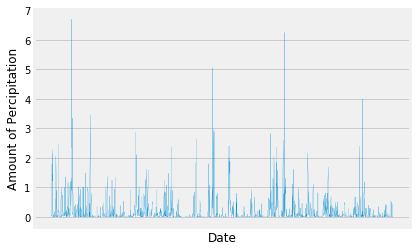

In [14]:
# Perform a query to retrieve the data and precipitation scores
sel = [Measurement.date, Measurement.prcp]
aug_23_2017 = session.query(*sel).filter(Measurement.date >= fecha).all()
                                                                       
# Save the query results as a Pandas DataFrame and set the index to the date column
df = pd.DataFrame(aug_23_2017, columns= ["date", "percipitation"])
df = df.set_index(df["date"])

# Sort the dataframe by date
df = df.sort_values("date")

# Use Pandas Plotting with Matplotlib to plot the data
weather = plt.plot(df["percipitation"], linewidth= 0.2)
plt.xticks(np.arange(0, step=10), rotation='vertical')
plt.xlabel("Date")
plt.ylabel("Amount of Percipitation")

plt.gcf()
plt.show()
# Rotate the xticks for the date

In [15]:
# Use Pandas to calcualte the summary statistics for the precipitation data
df_EDA = df.describe()
df_EDA

,percipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


In [16]:
# How many stations are available in this dataset?
station_count = session.query(func.count(Station.station)).all()
print(station_count)

[(9,)]


In [17]:
# What are the most active stations?
# List the stations and the counts in descending order.
select =[Station.station, func.count(Measurement.station)]
station_data = session.query(*select).filter(Measurement.station == Station.station)\
.group_by(Station.station).order_by(func.count(Measurement.station).desc()).all()

print(station_data)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


In [18]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature most active station?
tempmax = session.query(func.max(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
tempmin = session.query(func.min(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
tempavg = session.query(func.avg(Measurement.tobs)).filter(Measurement.station == "USC00519281").all()
   
print(tempmax, tempmin, tempavg)

[(85.0,)] [(54.0,)] [(71.66378066378067,)]


In [19]:
select2 =[Measurement.station, func.count(Measurement.tobs)]
station_data = session.query(*select2).group_by(Measurement.station).order_by(func.count(Measurement.tobs).desc()).all()
print(station_data)

[('USC00519281', 2772), ('USC00519397', 2724), ('USC00513117', 2709), ('USC00519523', 2669), ('USC00516128', 2612), ('USC00514830', 2202), ('USC00511918', 1979), ('USC00517948', 1372), ('USC00518838', 511)]


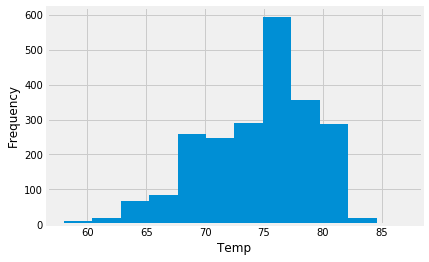

In [20]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
monthtemp = session.query(Measurement.date, Measurement.tobs).filter(Measurement.date >= fecha).all()
df2 = pd.DataFrame(monthtemp, columns= ["date", "temp"])
df2 = df2.sort_values("date")
df2 = df2.set_index(df2["date"])

fig = plt.hist(df2["temp"], bins=12)
plt.xlabel("Temp")
plt.ylabel("Frequency")

plt.show()

In [21]:
#OPTIONAL: Write a function called `calc_temps` that will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [35]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip = calc_temps("2016-05-22", "2016-05-29" )
print(trip)

[(67.0, 75.70833333333333, 81.0)]


In [43]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)


[(None,)]


In [24]:
# Calculate the rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation



## Optional Challenge Assignment

In [25]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [26]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`

# Set the start and end date of the trip

# Use the start and end date to create a range of dates

# Stip off the year and save a list of %m-%d strings

# Loop through the list of %m-%d strings and calculate the normals for each date


In [27]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index


In [28]:
# Plot the daily normals as an area plot with `stacked=False`
